In [1]:
import numpy as np
from skimage import io
from pathlib import Path
import re
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
folder = Path('ilastik_preds_raw_images')
files = folder.glob('*.h5')
files = sorted([x.as_posix() for x in files])
print(files)

['ilastik_preds_raw_images/XYZres008_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres018_0001_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres025_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres110_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres114_0001_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres201_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres204_0001_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres92_Simple Segmentation.h5', 'ilastik_preds_raw_images/XYZres95_0001_Simple Segmentation.h5']


In [7]:
pred.shape

(96, 1, 512, 512)

In [10]:
res = []
RECALL = []
PRECISION = []
for file in tqdm(files):
    f1 = h5py.File(file,'r+')
    pred = f1['exported_data'][:] - 1
    gt = io.imread(re.sub('.h5','_sub1.tiff',re.sub('ilastik_preds_raw_images','GT_filtered+raw',file)))
    dice = (2*(np.sum((gt==1)*(pred==1))+np.sum((gt==2)*(pred==2))))/(np.sum(gt!=0)+np.sum(pred!=0))
    recall = (np.sum((gt==1)*(pred==1)) + np.sum((gt==2)*(pred==2)))/(np.sum(gt==1) + np.sum(gt==2))
    precision = (np.sum((gt==1)*(pred==1)) + np.sum((gt==2)*(pred==2)))/(np.sum(pred==1) + np.sum(pred==2))
    #print(precision)
    #print(recall)
    res.append(dice)
    RECALL.append(recall)
    PRECISION.append(precision)
    #print(dice)
    #print(img_pred.shape)
    #print(img_gt.shape)
print(np.mean(res))
print(np.std(res))
print(np.mean(RECALL))
print(np.std(RECALL))
print(np.mean(PRECISION))
print(np.std(PRECISION))

100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

0.4107513978504621
0.268380347037636
0.8599223218015363
0.16088419057463405
0.31068926466104824
0.24549295894210674


In [12]:
folder = Path('ilastik_preds_raw_images')
files = folder.glob('*mean.npy')
files = sorted([x.as_posix() for x in files])
print(files)

['ilastik_preds_raw_images/XYZres008_mean.npy', 'ilastik_preds_raw_images/XYZres018_0001_mean.npy', 'ilastik_preds_raw_images/XYZres025_mean.npy', 'ilastik_preds_raw_images/XYZres110_mean.npy', 'ilastik_preds_raw_images/XYZres114_0001_mean.npy', 'ilastik_preds_raw_images/XYZres201_mean.npy', 'ilastik_preds_raw_images/XYZres204_0001_mean.npy', 'ilastik_preds_raw_images/XYZres92_mean.npy', 'ilastik_preds_raw_images/XYZres95_0001_mean.npy']


In [23]:
vessel_dsc=[]
vessel_recall=[]
vessel_precision = []
neuron_dsc=[]
neuron_recall = []
neuron_precision = []
dsc_combined = []
DSC = []
RECALL = []
PRECISION = []
for file in tqdm(files):
    mean = np.load(file)
    std = np.load(re.sub("mean","std",file))
    pred = np.argmax(mean,axis=0)
    gt = io.imread(re.sub('mean.npy','Simple Segmentation_sub1.tiff',re.sub('ilastik_preds_raw_images','GT_filtered+raw',file)))
    gt = resize(gt,(252,1,507,507),order=0,preserve_range=True)[:,0]
    gt = np.swapaxes(gt,0,2)
    cats = [1,2]
    for i in cats:
        dsc = (2*np.sum((gt==i)*(pred==i)))/(np.sum(gt==i)+np.sum(pred==i))
        recall = np.sum((gt==i)*(pred==i))/np.sum(gt==i)
        precision = np.sum((gt==i)*(pred==i))/np.sum(pred==i)
        if i == 1:
            vessel_dsc.append(dsc)
            vessel_recall.append(recall)
            vessel_precision.append(precision)
        elif i == 2:
            neuron_dsc.append(dsc)
            neuron_recall.append(recall)
            neuron_precision.append(precision)
    dsc = (2*(np.sum((gt==1)*(pred==1))+np.sum((gt==2)*(pred==2))))/(np.sum(gt!=0)+np.sum(pred!=0))
    recall = (np.sum((gt==1)*(pred==1)) + np.sum((gt==2)*(pred==2)))/(np.sum(gt==1) + np.sum(gt==2))
    precision = (np.sum((gt==1)*(pred==1)) + np.sum((gt==2)*(pred==2)))/(np.sum(pred==1) + np.sum(pred==2))
    DSC.append(dsc)
    RECALL.append(recall)
    PRECISION.append(precision)
print(np.mean(DSC))
print(np.std(DSC))

100%|██████████| 9/9 [01:09<00:00,  7.72s/it]

0.773943480456627
0.061513523956564016


In [ ]:
print(np.mean(RECALL))
print(np.std(RECALL))
print(np.mean(PRECISION))
print(np.std(PRECISION))

In [16]:
print(np.mean(vessel_dsc))
print(np.std(vessel_dsc))

0.7770898463158615
0.07495907792951746


In [17]:
print(np.mean(vessel_recall))
print(np.std(vessel_recall))

0.7580868895366376
0.1480820682813051


In [18]:
print(np.mean(vessel_precision))
print(np.std(vessel_precision))

0.8249734648192293
0.05436723340957387


In [19]:
print(np.mean(neuron_dsc))
print(np.std(neuron_dsc))

0.7551333496687952
0.03076874149468306


In [20]:
print(np.mean(neuron_recall))
print(np.std(neuron_recall))

0.8092016566442743
0.051249147343521206


In [21]:
print(np.mean(neuron_precision))
print(np.std(neuron_precision))

0.716951159457274
0.08252414289416908


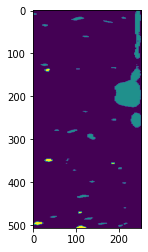

In [23]:
plt.imshow(img_gt[30])

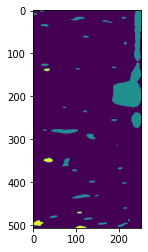

In [24]:
plt.imshow(img_pred[30])

In [28]:
np.unique(img_pred)

array([0, 1, 2])

In [36]:
np.unique(img_gt)

array([0., 1., 2.])

In [25]:
img_gt.shape

(507, 507, 252)

In [26]:
std.shape

(3, 507, 507, 252)

In [10]:
np.unique(np.argmax(mean,axis=0))

array([0, 1, 2])